<span style="font-size:30px;"> **Project: The Hottest Topics in Machine Learning**

This project uses Natural Language Processing (NLP) on [Neural Information Processing Systems (NIPS)](https://en.wikipedia.org/wiki/Conference_on_Neural_Information_Processing_Systems) papers to uncover the trendiest topics in Machine Learning research 

##### **1. Loading the dataset and libraries**

In [1]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
%matplotlib inline

The dataset contains information on different NIPS papers that were published from 1987 to 2017, discuss multiple topics on machine learning. 

In [2]:
papers = pd.read_csv('papers.csv')
papers.head(5)

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


##### **2.Prepare data**
For the purpose of analysis, we are only interested in text data associated with the paper and publishing year. Therefore, we will remove other columns.

In [3]:
papers = papers.drop(['id', 'event_type', 'pdf_name'], axis=1)
papers.head(5)

,year,title,abstract,paper_text
0,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1994,Bayesian Query Construction for Neural Network...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1994,"Neural Network Ensembles, Cross Validation, an...",Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


##### **3. Plotting how machine learning has evolved over time**
Visualize the number of publications per year to get better understand how machine learning has changed throughout the years.

In [4]:
# Group the papers by year
groups = papers.groupby('year')

# Count the size of each groups
counts = groups.size()

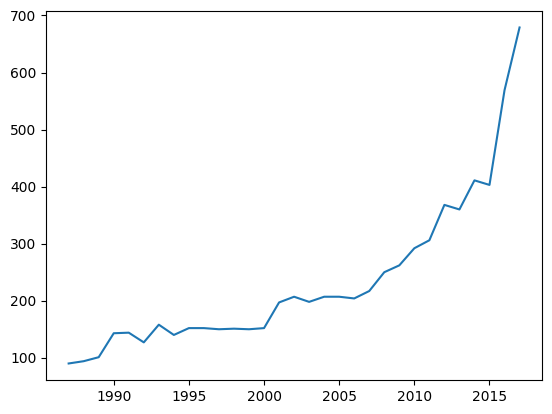

In [5]:
# Visualize the counts as a bar plot
plt.plot(counts)

As can be seen from the chart, there is an upward trend on the number of publications about Machine Learning in the last 30 years. This signicant increase is attributed to the development of computer power, data and algorithms.

##### **4. Preprocessing the text data**
Analyze the titles of different papers to identify machine learning trends

In [6]:
import re

In [7]:
# Print titles of first rows
print(papers['title'].head())

0    Self-Organization of Associative Database and ...
1    A Mean Field Theory of Layer IV of Visual Cort...
2    Storing Covariance by the Associative Long-Ter...
3    Bayesian Query Construction for Neural Network...
4    Neural Network Ensembles, Cross Validation, an...
Name: title, dtype: object


For the purpose of analysis, we will use regular expression `re` to remove punctuation then convert them to lowercase

In [8]:
# Remove punctuation
papers['title_processed'] = papers['title'].map(lambda x:re.sub('[,\.!?]','',x))

# Convert to lowercase
papers['title_processed'] = papers['title_processed'].apply(lambda x: x.lower())

papers['title_processed'].head()


0    self-organization of associative database and ...
1    a mean field theory of layer iv of visual cort...
2    storing covariance by the associative long-ter...
3    bayesian query construction for neural network...
4    neural network ensembles cross validation and ...
Name: title_processed, dtype: object

##### **5. Word Cloud to visualize the preprocessed text data**

Use `wordcloud` library to create a word cloud visualizing the most common words in the title.

In [9]:
import wordcloud as wc

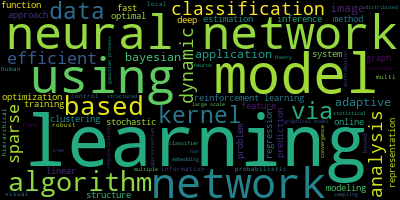

In [10]:
# Convert all titles to a single string
long_string = ' '.join(list(papers['title_processed'].values))

# Create a wordcloud object
wordcloud = wc.WordCloud()

# Generate a wordcloud
wordcloud.generate(long_string)

# Visualize
wordcloud.to_image()


##### **6. Prepare the text for LDA analysis**

*Latent Dirichlet Allocation (LDA) takes a collection of unlabelled documents and attempts to find the structure or topic in this collection. LDA is a probabilistic topic model and treats documents as a bag-of-words.*

Use Latent Dirichlet Allocation (LDA) to perform topic detection on large document sets. Note that LDA does not work directly with data. Therefore, steps include:
* Convert the documents into a simple vector representation (for LDA to use). Each entry correspond with the number of times a word occured in the document.
* Plot the 10 most common words based on outcome of this operation (these words should also occur in the word cloud)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

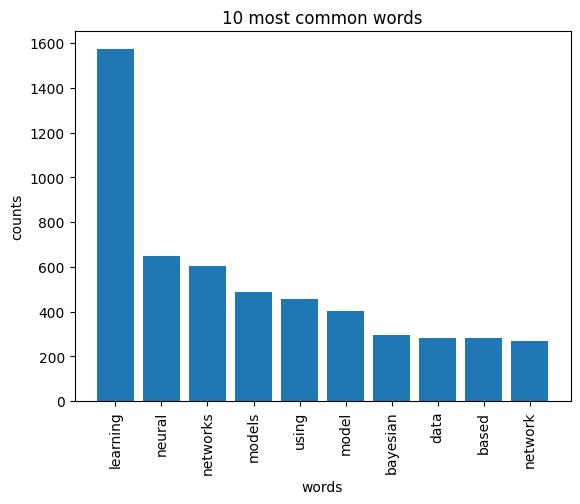

In [12]:
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    # Fit and transform the count data
    count_data = count_vectorizer.fit_transform(count_data)
    words = count_vectorizer.get_feature_names_out()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

# Initialise the count vectorizer with the English stopwords
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(papers['title_processed'])

# Convert the csr_matrix to a list before calling the lower() method
titles = [title.lower() for title in papers['title_processed'].tolist()]

# Visualise the 10 most common words
plot_10_most_common_words(titles, count_vectorizer)


##### **7. Analyzing trends with LDA**

The research titles will be analyzed using LDA. In order to process a new set of documents, a similar set of steps of preprocessing will be required to be taken. We can start with a different number of topics and then distinguish what each topic is about. 

In [14]:
# Ignore DepreciationWarning warning
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

In [17]:
# Load the LDA model from sklearn
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Helper function to print the topics
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names_out()

    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    
# Tweak the two parameters below (use int values below 15)
number_topics = 10
number_words = 2

# Cretae and fit the LDA model
lda = LDA(n_components = number_topics)
lda.fit(count_data)

# Print the topics found by LDA model
print("Topic found via LDA:")
print_topics(lda, count_vectorizer, number_words)


Topic found via LDA:

Topic #0:
information learning

Topic #1:
networks neural

Topic #2:
recognition clustering

Topic #3:
learning optimization

Topic #4:
learning gaussian

Topic #5:
models inference

Topic #6:
multi estimation

Topic #7:
analysis spike

Topic #8:
learning bayesian

Topic #9:
learning models
